<a href="https://colab.research.google.com/github/MinwooKim1990/Music/blob/main/sound%20_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

sr, x = read('/content/second.mp3')
# Perform the FFT on left channel
left_channel_frequencies = x[:, 0]

# Perform the FFT on right channel
right_channel_frequencies = x[:, 1]

# Print the frequencies of each channel
print("Left channel frequencies:", left_channel_frequencies)
print("Right channel frequencies:", right_channel_frequencies)

print(x)
print(sr)

Left channel frequencies: [0 0 0 ... 0 0 0]
Right channel frequencies: [0 0 0 ... 0 0 0]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
44100


14281344


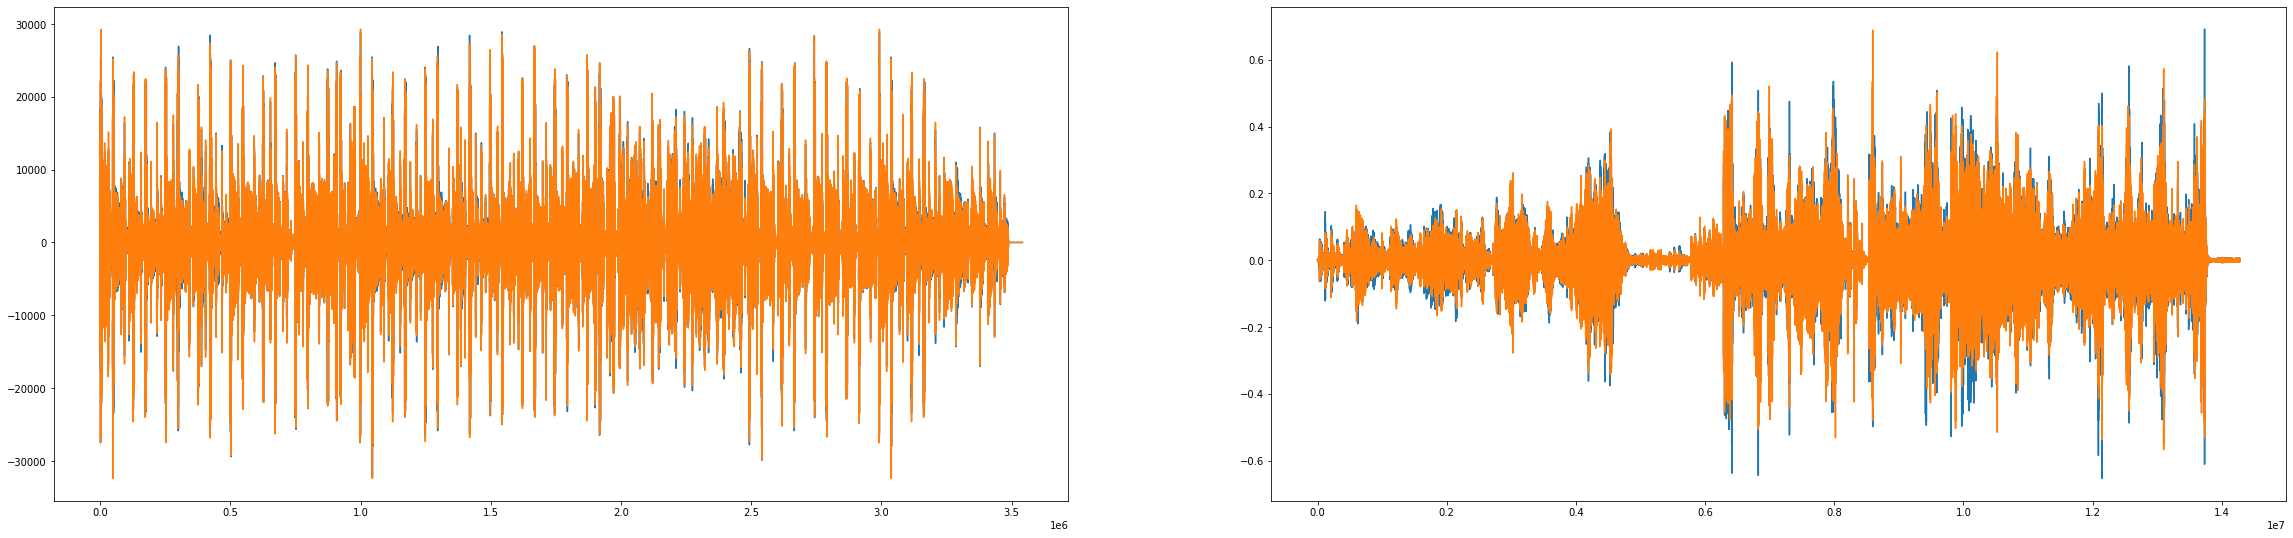

In [3]:
import matplotlib.pyplot as plt
srn, xn=read('/content/tarantella.mp3',True)
print(len(xn))
plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(x)
plt.subplot(2, 2, 2)
plt.plot(xn)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
violin frequencies:  (array([    4531,     4532,     4534, ..., 14278484, 14278485, 14278488]), array([0, 0, 0, ..., 0, 0, 0]))
piano frequencies:  (array([    2210,     2211,     2212, ..., 14278673, 14278674, 14278675]), array([0, 0, 0, ..., 0, 0, 0]))
2
2


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


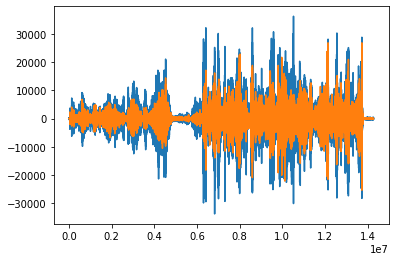

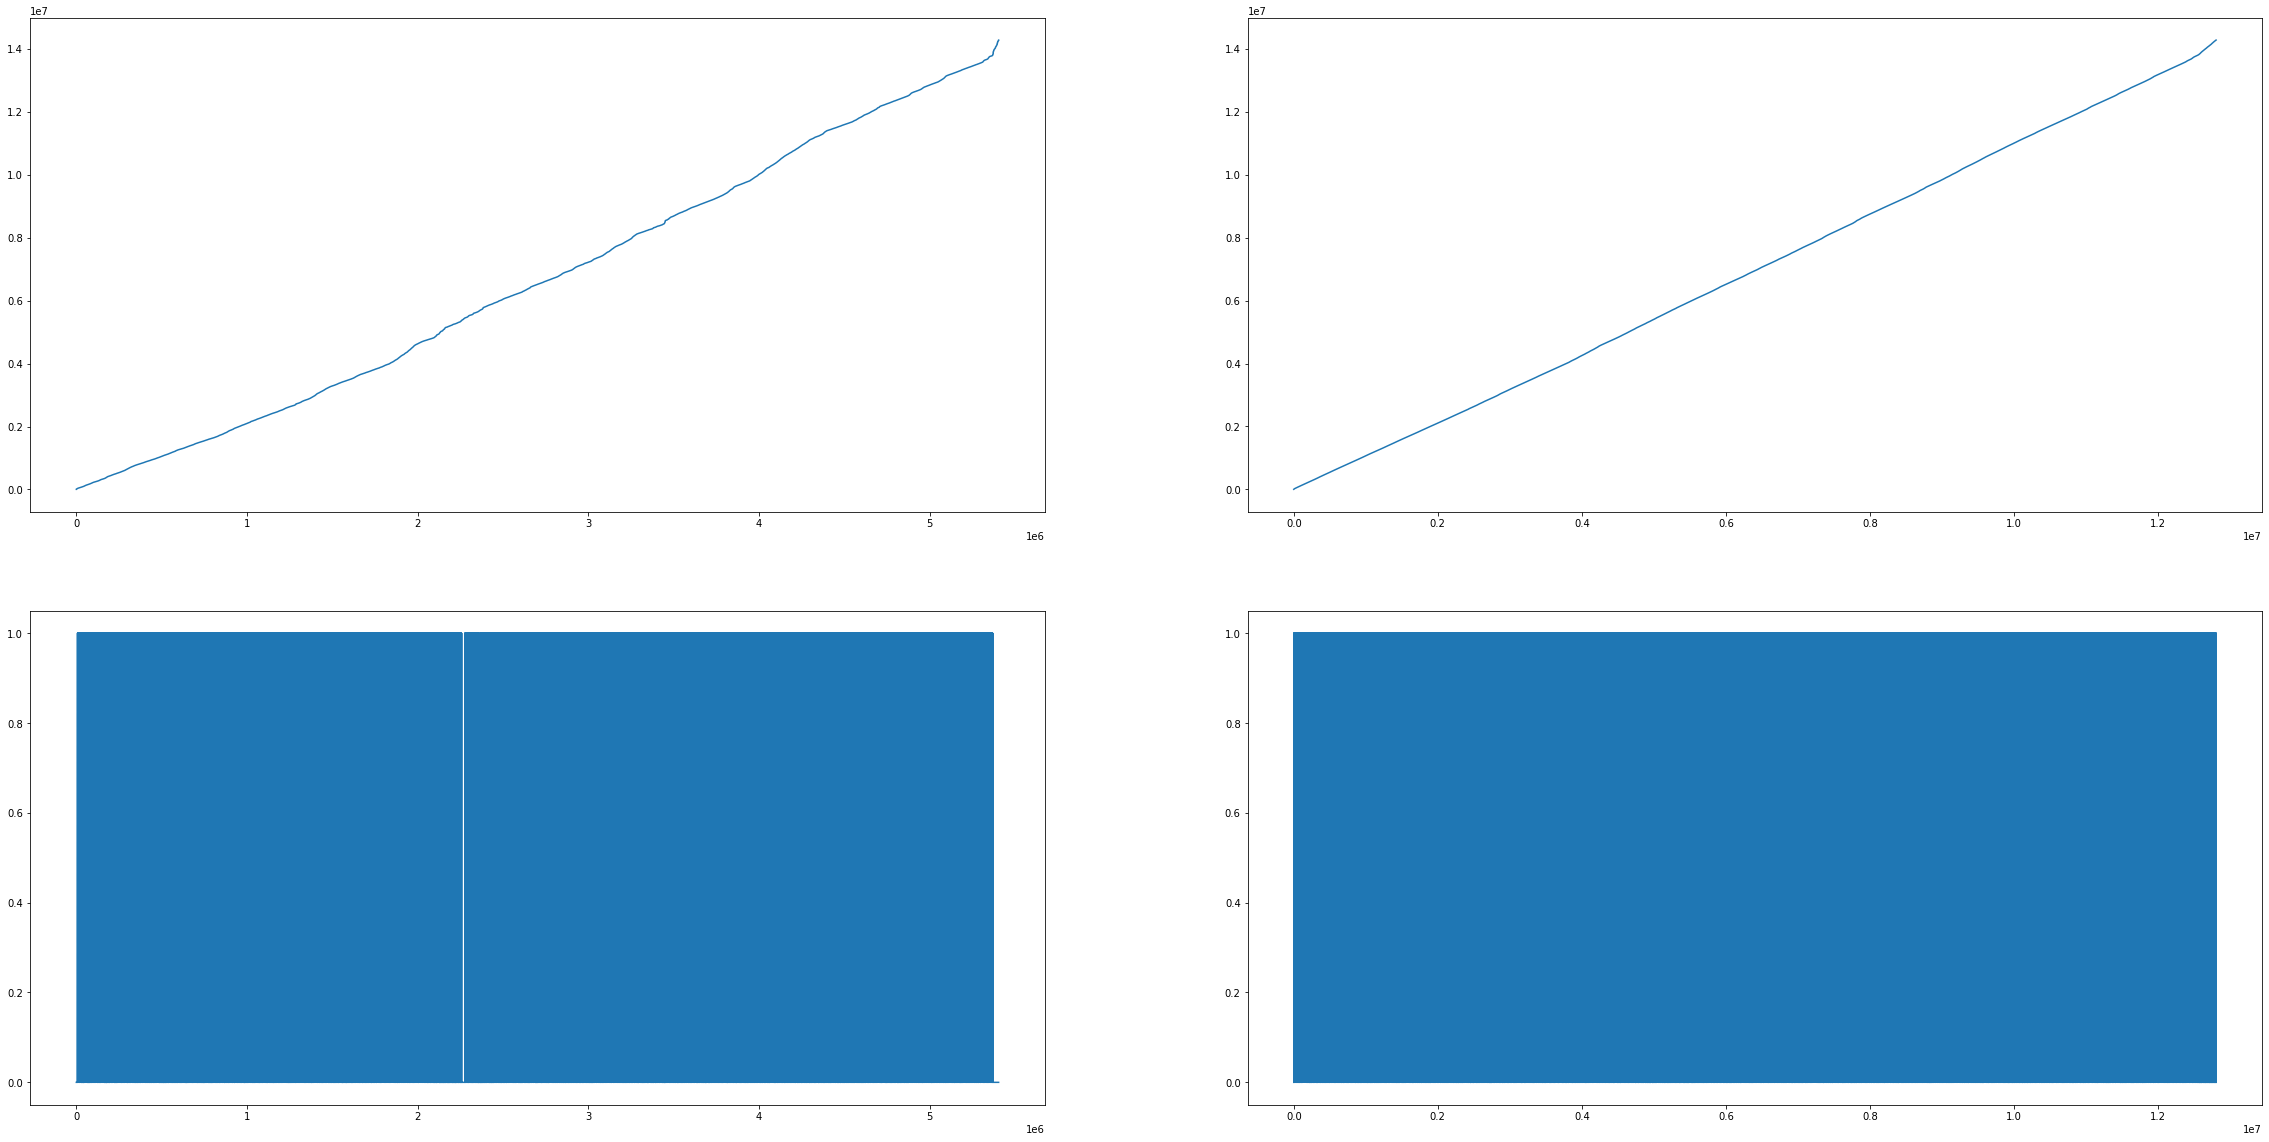

In [13]:
import numpy as np
from scipy.fft import fft
srx, xx=read('/content/tarantella.mp3',False)
# Perform the FFT
frequencies = np.fft.fft(xx)

# Print the frequencies
print(frequencies)
# Get the absolute value of the frequencies
amplitudes = np.abs(frequencies)

# Print the amplitudes
print(amplitudes)
#instruments frequencies
violin_frequencies = np.where((frequencies >= 220) & (frequencies <= 1000))
piano_frequencies = np.where((frequencies >= 27.5) & (frequencies <= 4186))

#Print the frequencies of each instruments
print("violin frequencies: ", violin_frequencies)
print("piano frequencies: ", piano_frequencies)
print(len(violin_frequencies))
print(len(piano_frequencies))
plt.plot(frequencies)
plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(violin_frequencies[0])
plt.subplot(2, 2, 2)
plt.plot(piano_frequencies[0])
plt.subplot(2, 2, 3)
plt.plot(violin_frequencies[1])
plt.subplot(2, 2, 4)
plt.plot(piano_frequencies[1])

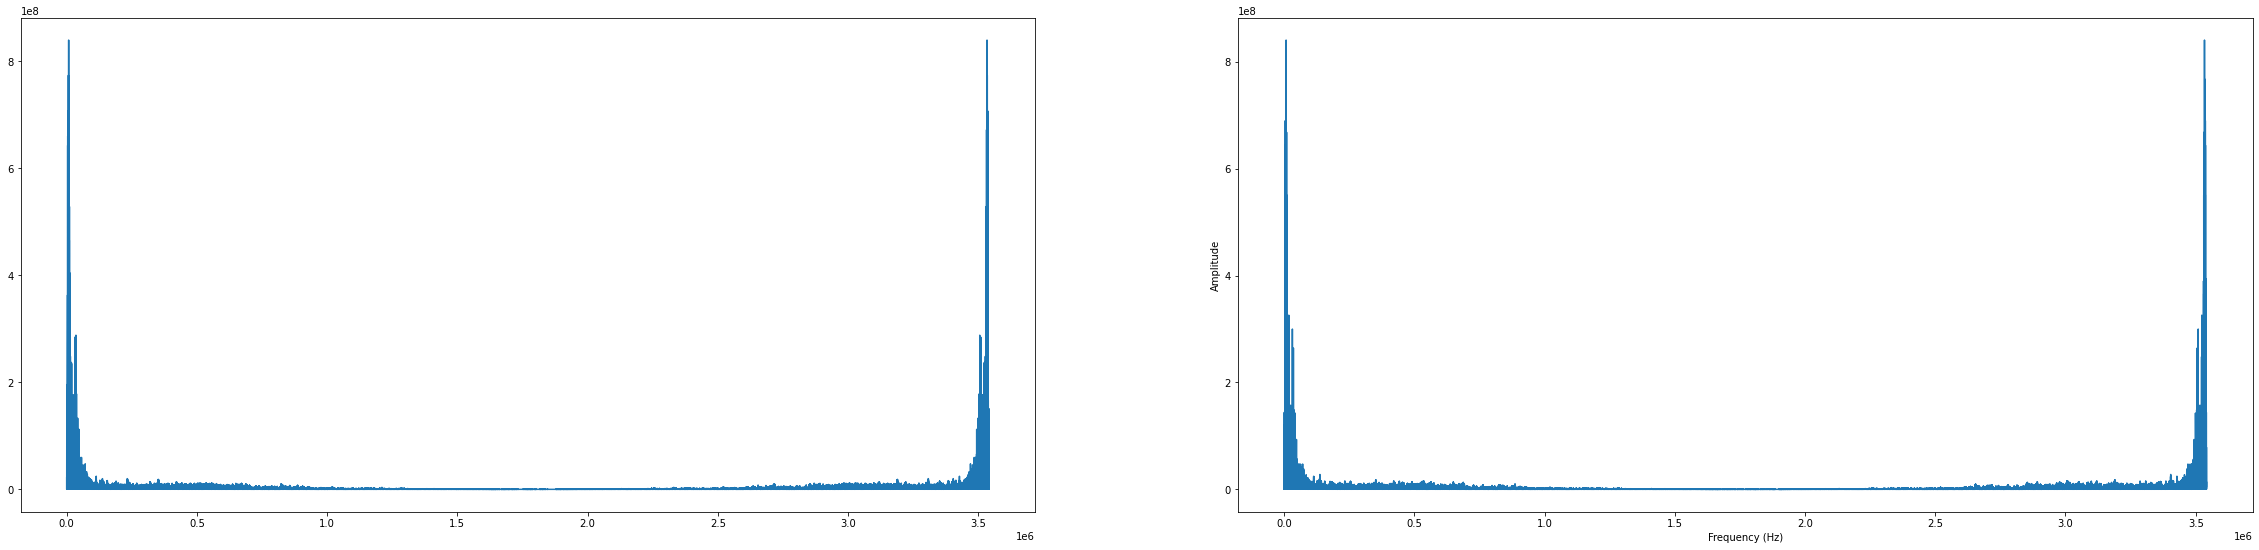

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two complex exponentials
y1 = x[:, 0]
y2 = x[:, 1]

# Perform the FFT
frequencies1 = np.fft.fft(y1)
frequencies2 = np.fft.fft(y2)

# Plot the FFT of the two complex exponentials
plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(np.abs(frequencies1))
plt.subplot(2, 2, 2)
plt.plot(np.abs(frequencies2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


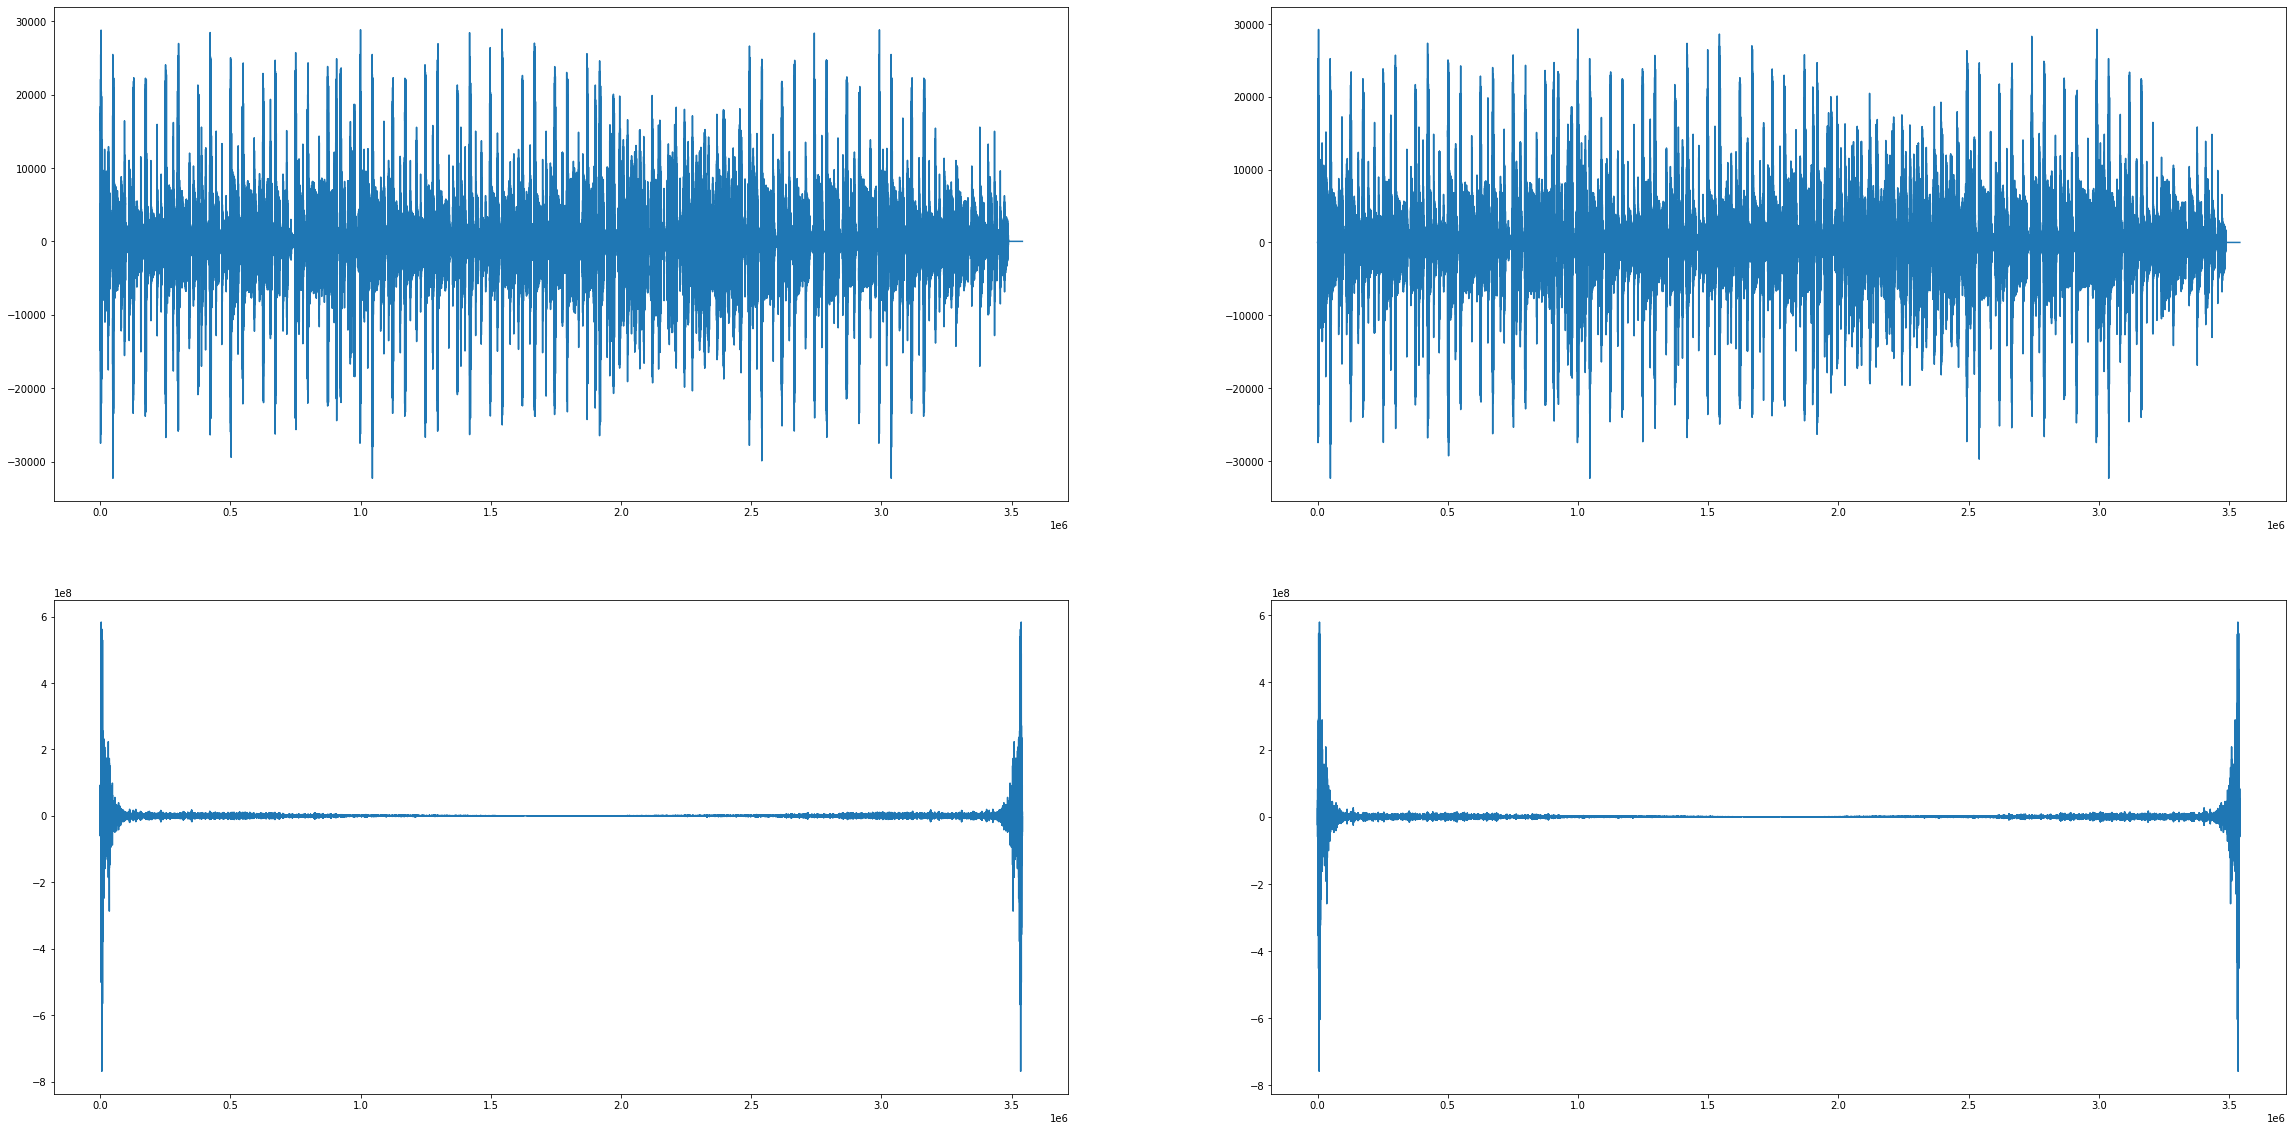

In [9]:
plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(y1)
plt.subplot(2, 2, 2)
plt.plot(y2)
plt.subplot(2, 2, 3)
plt.plot(frequencies1)
plt.subplot(2, 2, 4)
plt.plot(frequencies2)